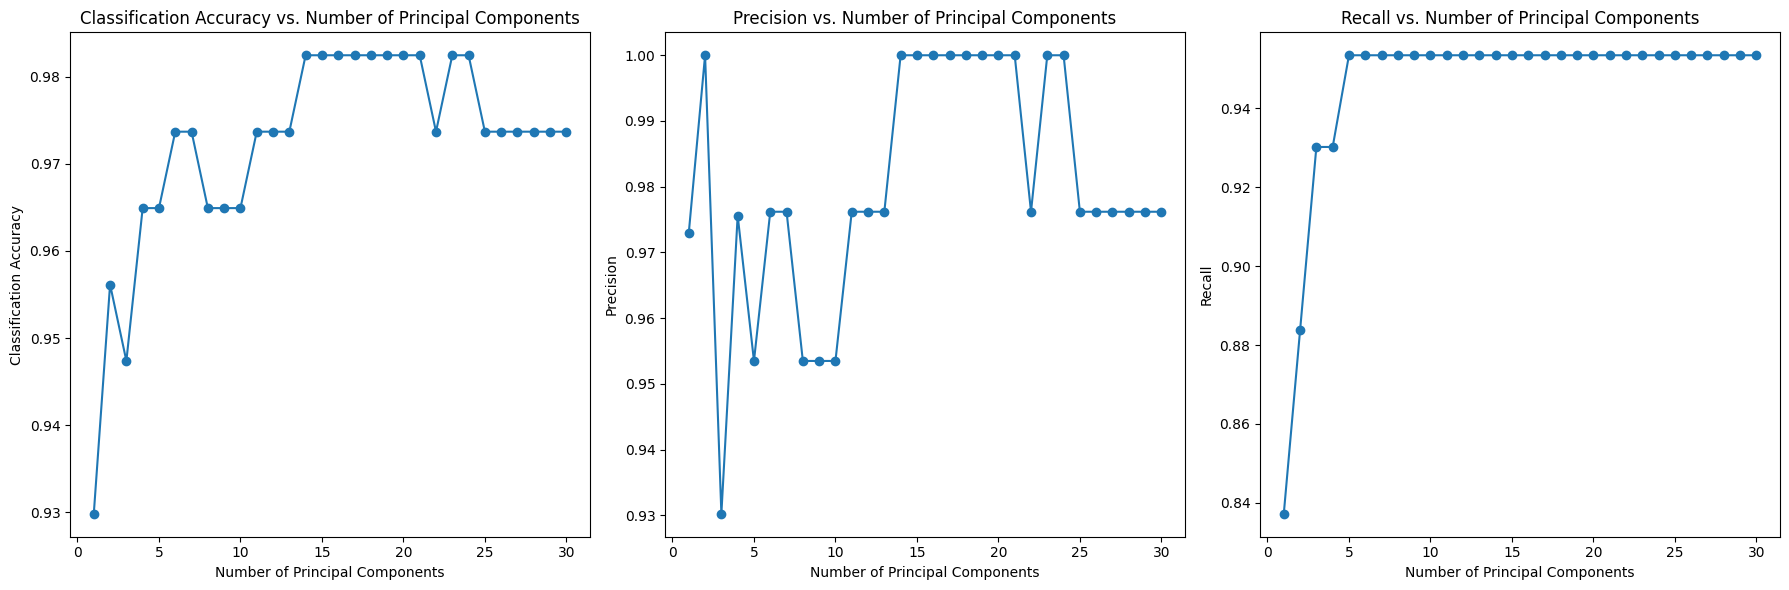

Optimum number of principal components (K): 14
Classification Accuracy for optimum K: 0.9824561403508771
Precision for optimum K: 1.0
Recall for optimum K: 0.9534883720930233


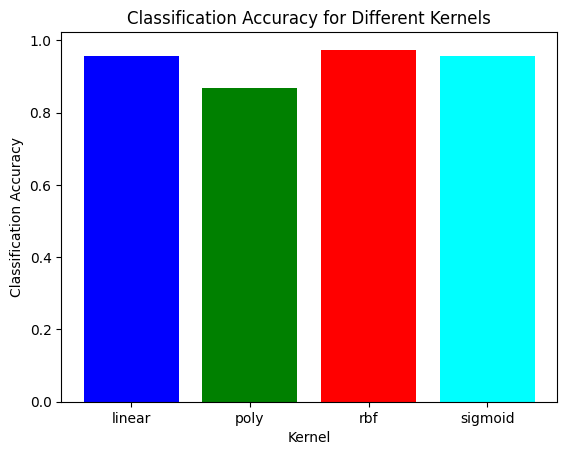

Kernel: linear, Classification Accuracy: 0.956140350877193
Kernel: poly, Classification Accuracy: 0.868421052631579
Kernel: rbf, Classification Accuracy: 0.9736842105263158
Kernel: sigmoid, Classification Accuracy: 0.956140350877193


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('cancer.csv')

# Preprocess the data
# Drop the 'id' column
data = data.drop(columns=['id'])

# Encode the 'diagnosis' column
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Handle missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)

# Split the data into features and target
X = data_imputed[:, 1:]  # All columns except the diagnosis
y = data_imputed[:, 0]   # Diagnosis column

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Lists to store metrics
ks = range(1, X_train.shape[1] + 1)
accuracies = []
precisions = []
recalls = []

# Try different numbers of principal components
for k in ks:
    # Apply PCA
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train the SVM classifier with different kernels
    svm = SVC(kernel='rbf', random_state=42)
    svm.fit(X_train_pca, y_train)

    # Make predictions
    y_pred = svm.predict(X_test_pca)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Store metrics
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

# Plot the metrics
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(ks, accuracies, marker='o')
plt.title('Classification Accuracy vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Classification Accuracy')

plt.subplot(1, 3, 2)
plt.plot(ks, precisions, marker='o')
plt.title('Precision vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Precision')

plt.subplot(1, 3, 3)
plt.plot(ks, recalls, marker='o')
plt.title('Recall vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Recall')

plt.tight_layout()
plt.show()

# Find the optimum number of principal components
optimum_k = ks[accuracies.index(max(accuracies))]
optimum_accuracy = max(accuracies)
optimum_precision = precisions[accuracies.index(max(accuracies))]
optimum_recall = recalls[accuracies.index(max(accuracies))]

print(f"Optimum number of principal components (K): {optimum_k}")
print(f"Classification Accuracy for optimum K: {optimum_accuracy}")
print(f"Precision for optimum K: {optimum_precision}")
print(f"Recall for optimum K: {optimum_recall}")

# Comparison of different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_accuracies = []

for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train_pca, y_train)
    y_pred = svm.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    kernel_accuracies.append(accuracy)

# Plot the results for different kernels
plt.figure()
plt.bar(kernels, kernel_accuracies, color=['blue', 'green', 'red', 'cyan'])
plt.title('Classification Accuracy for Different Kernels')
plt.xlabel('Kernel')
plt.ylabel('Classification Accuracy')
plt.show()

# Print comparison of accuracies for different kernels
for kernel, accuracy in zip(kernels, kernel_accuracies):
    print(f"Kernel: {kernel}, Classification Accuracy: {accuracy}")


Summary statistics of the processed data:
                 0             1           2           3           4   \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

               5           6           7           8           9           10  \
count  545.000000  545.000000  545.000000  545.000000  545.000000  545.000000   
mean     0.693578    0.858716    0.177982    0.350459    0.045872    0.315596   
std      0.861586    0.348635    0.382849    0.477552    

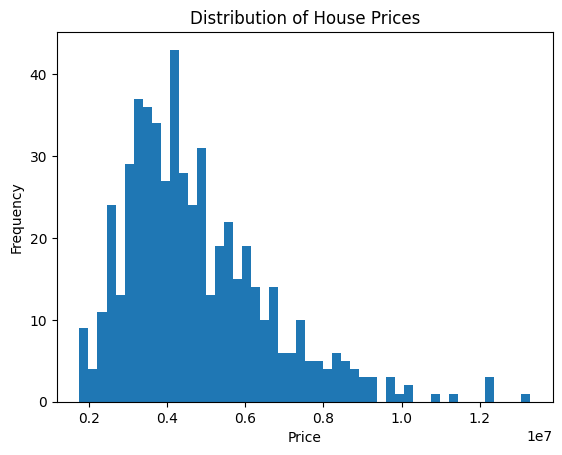

Baseline Mean Squared Error: 5145176852226.263
Baseline R-squared: -0.017925679424830143
Explained variance ratio for K=1: 0.1896590780553168
Explained variance ratio for K=2: 0.3141011725631066
Explained variance ratio for K=3: 0.42923505810874235
Explained variance ratio for K=4: 0.5254927010398771
Explained variance ratio for K=5: 0.6132828157533499
Explained variance ratio for K=6: 0.6825309955782387
Explained variance ratio for K=7: 0.746003260289044
Explained variance ratio for K=8: 0.8014116923599581
Explained variance ratio for K=9: 0.8540340435413744
Explained variance ratio for K=10: 0.8990548421184418
Explained variance ratio for K=11: 0.9415809733715348
Explained variance ratio for K=12: 0.9726232748197357
Explained variance ratio for K=13: 1.0000000000000002
Optimum number of principal components (K): 1
Mean Squared Error for optimum K: 5567830645028.251
R-squared for optimum K: -0.10154382541980977


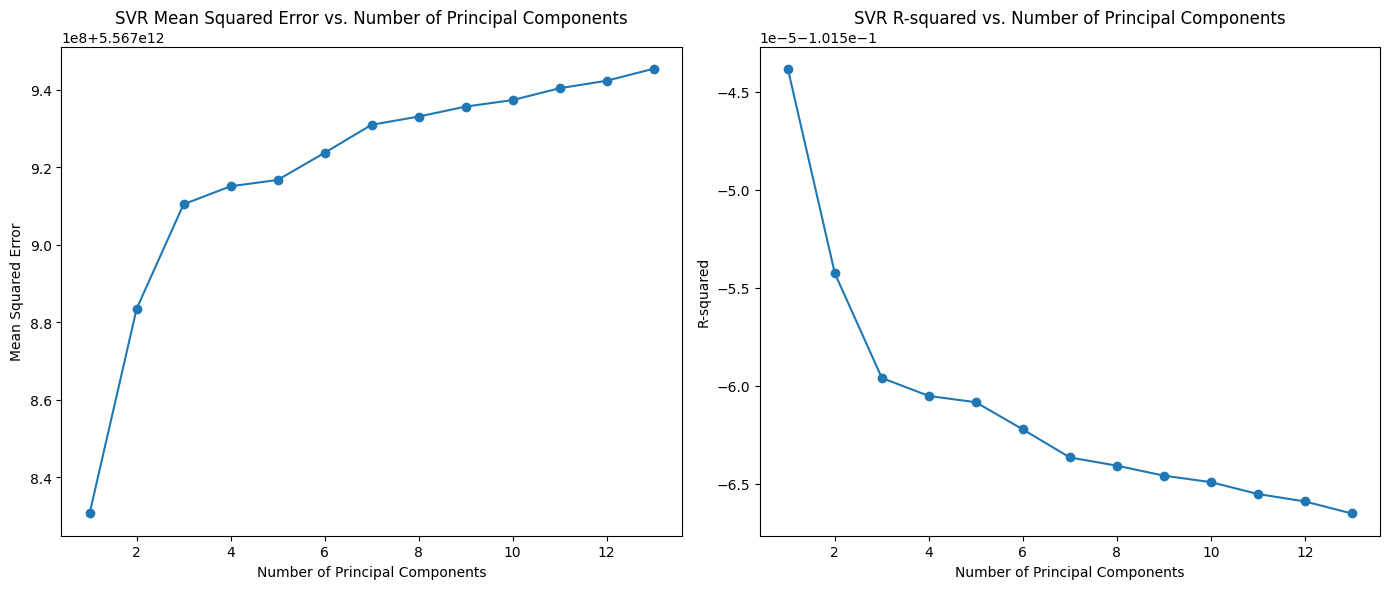

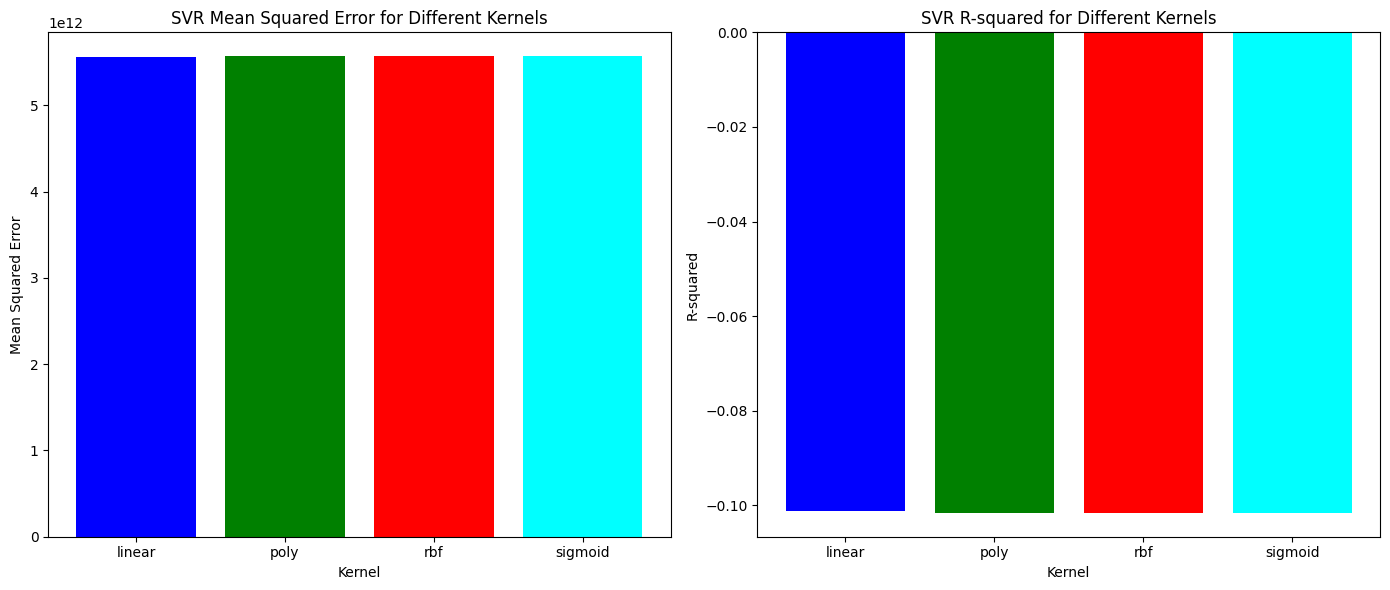

Kernel: linear, Mean Squared Error: 5565727162505.901, R-squared: -0.10112767084685381
Kernel: poly, Mean Squared Error: 5567913301267.349, R-squared: -0.10156017819266072
Kernel: rbf, Mean Squared Error: 5567945382868.151, R-squared: -0.10156652524082488
Kernel: sigmoid, Mean Squared Error: 5567839900265.486, R-squared: -0.10154565648294356


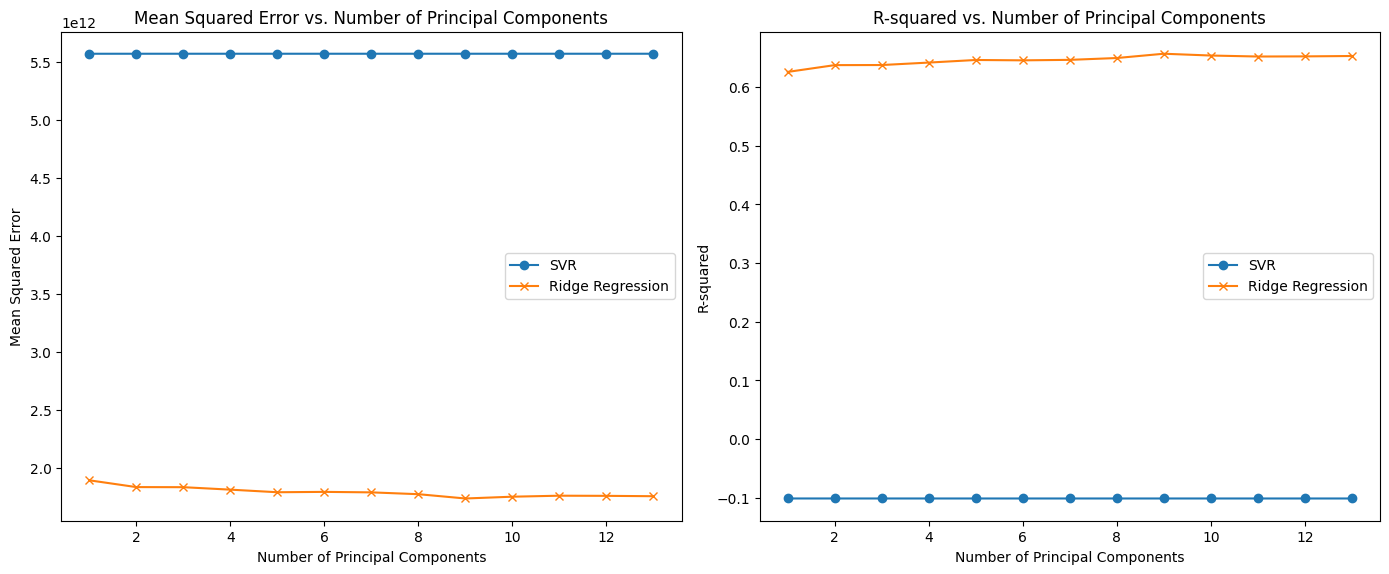

Optimum number of principal components for Ridge Regression (K): 9
Ridge Regression Mean Squared Error for optimum K: 1735174616681.5876
Ridge Regression R-squared for optimum K: 0.6567117416300132


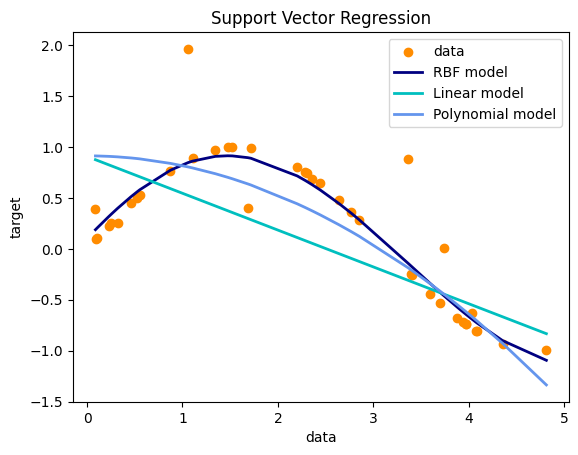

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
housing_data = pd.read_csv('Housing.csv')

# Preprocess the data
# Encode categorical variables
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
housing_data = pd.get_dummies(housing_data, columns=categorical_cols, drop_first=True)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
housing_data_imputed = imputer.fit_transform(housing_data)

# Print summary statistics of the processed data
print("Summary statistics of the processed data:")
print(pd.DataFrame(housing_data_imputed).describe())

# Check the distribution of the target variable
plt.figure()
plt.hist(housing_data_imputed[:, 0], bins=50)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Split the data into features and target
X = housing_data_imputed[:, 1:]  # All columns except the price
y = housing_data_imputed[:, 0]   # Price column

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Lists to store metrics
ks = range(1, X_train.shape[1] + 1)
svr_mses = []
svr_r2s = []

# Baseline model
baseline_mse = mean_squared_error(y_test, [np.mean(y_train)] * len(y_test))
baseline_r2 = r2_score(y_test, [np.mean(y_train)] * len(y_test))

print(f"Baseline Mean Squared Error: {baseline_mse}")
print(f"Baseline R-squared: {baseline_r2}")

# Try different numbers of principal components
for k in ks:
    # Apply PCA
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Print explained variance ratio
    print(f"Explained variance ratio for K={k}: {pca.explained_variance_ratio_.sum()}")

    # Train the SVR model with different kernels
    svr = SVR(kernel='rbf')
    svr.fit(X_train_pca, y_train)

    # Make predictions
    y_pred = svr.predict(X_test_pca)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    svr_mses.append(mse)
    svr_r2s.append(r2)

# Find the optimum number of principal components
optimum_k = ks[svr_r2s.index(max(svr_r2s))]
optimum_mse = svr_mses[svr_r2s.index(max(svr_r2s))]
optimum_r2 = max(svr_r2s)

print(f"Optimum number of principal components (K): {optimum_k}")
print(f"Mean Squared Error for optimum K: {optimum_mse}")
print(f"R-squared for optimum K: {optimum_r2}")

# Plot the metrics
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(ks, svr_mses, marker='o')
plt.title('SVR Mean Squared Error vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Squared Error')

plt.subplot(1, 2, 2)
plt.plot(ks, svr_r2s, marker='o')
plt.title('SVR R-squared vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('R-squared')

plt.tight_layout()
plt.show()

# Comparison of different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_mses = []
kernel_r2s = []

for kernel in kernels:
    svr = SVR(kernel=kernel)
    svr.fit(X_train_pca, y_train)
    y_pred = svr.predict(X_test_pca)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    kernel_mses.append(mse)
    kernel_r2s.append(r2)

# Plot the results for different kernels
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.bar(kernels, kernel_mses, color=['blue', 'green', 'red', 'cyan'])
plt.title('SVR Mean Squared Error for Different Kernels')
plt.xlabel('Kernel')
plt.ylabel('Mean Squared Error')

plt.subplot(1, 2, 2)
plt.bar(kernels, kernel_r2s, color=['blue', 'green', 'red', 'cyan'])
plt.title('SVR R-squared for Different Kernels')
plt.xlabel('Kernel')
plt.ylabel('R-squared')

plt.tight_layout()
plt.show()

# Print comparison of accuracies for different kernels
for kernel, mse, r2 in zip(kernels, kernel_mses, kernel_r2s):
    print(f"Kernel: {kernel}, Mean Squared Error: {mse}, R-squared: {r2}")

# Comparison with Linear Regression with Regularization (Ridge Regression)
ridge_mses = []
ridge_r2s = []

for k in ks:
    # Apply PCA
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train the Ridge Regression model
    ridge = Ridge()
    ridge.fit(X_train_pca, y_train)

    # Make predictions
    y_pred = ridge.predict(X_test_pca)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    ridge_mses.append(mse)
    ridge_r2s.append(r2)

# Plot the comparison
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(ks, svr_mses, marker='o', label='SVR')
plt.plot(ks, ridge_mses, marker='x', label='Ridge Regression')
plt.title('Mean Squared Error vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Squared Error')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(ks, svr_r2s, marker='o', label='SVR')
plt.plot(ks, ridge_r2s, marker='x', label='Ridge Regression')
plt.title('R-squared vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('R-squared')
plt.legend()

plt.tight_layout()
plt.show()

# Print comparison with Ridge Regression
optimum_ridge_k = ks[ridge_r2s.index(max(ridge_r2s))]
optimum_ridge_mse = ridge_mses[ridge_r2s.index(max(ridge_r2s))]
optimum_ridge_r2 = max(ridge_r2s)

print(f"Optimum number of principal components for Ridge Regression (K): {optimum_ridge_k}")
print(f"Ridge Regression Mean Squared Error for optimum K: {optimum_ridge_mse}")
print(f"Ridge Regression R-squared for optimum K: {optimum_ridge_r2}")

# #############################################################################
# Generate sample data similar to the Canvas example
X_sample = np.sort(5 * np.random.rand(40, 1), axis=0)
y_sample = np.sin(X_sample).ravel()
y_sample[::5] += 3 * (0.5 - np.random.rand(8))

# Fit regression models
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X_sample, y_sample).predict(X_sample)
y_lin = svr_lin.fit(X_sample, y_sample).predict(X_sample)
y_poly = svr_poly.fit(X_sample, y_sample).predict(X_sample)

# Look at the results
plt.scatter(X_sample, y_sample, color='darkorange', label='data')
plt.plot(X_sample, y_rbf, color='navy', lw=2, label='RBF model')
plt.plot(X_sample, y_lin, color='c', lw=2, label='Linear model')
plt.plot(X_sample, y_poly, color='cornflowerblue', lw=2, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()
